In [15]:
import scanpy as sc
import math
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

int_adata = sc.read_h5ad("../data/sarcoma_all/data_numbat_sarcoma_tumor_unmerged.h5ad")
sc.tl.pca(int_adata)
df = int_adata.obs.copy()
pcas = pd.DataFrame(int_adata.obsm['X_pca'])
pcas.index = df.index

In [16]:
set(int_adata.obs['compartment_opt'])

{'tumor'}

In [17]:
pcas

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Sarcoma167GEX_GATTCAGAGCCGATTT-1,-26.611977,-8.166593,-7.627262,11.622590,3.764087,-6.485112,7.046864,-1.199442,1.158233,2.038363,...,1.912547,0.146125,1.655125,2.630111,-0.268467,-1.901472,-1.473600,3.393913,0.441519,-0.694735
Sarcoma167GEX_ATCGAGTGTGCTTCTC-1,-22.582611,-2.432492,-11.529224,11.549490,10.724799,-0.685366,2.611341,2.444659,0.085143,-0.867137,...,-1.226000,1.553731,0.842292,1.335827,0.203526,-2.535384,1.292437,-0.205301,1.072107,-2.592740
Sarcoma167GEX_CTAGAGTGTTCCCGAG-1,-20.316952,-11.778711,-4.714766,11.907929,5.365849,-11.861040,12.200952,-6.459712,-0.914257,-3.143490,...,1.722302,-1.937089,-0.446408,1.046054,2.028989,-0.956984,1.267838,2.488192,1.348544,0.789651
Sarcoma167GEX_TCTGAGACAATCCAAC-1,-24.709854,-7.206454,-8.624127,9.080256,2.759545,4.207896,4.010600,3.927220,3.314485,0.795814,...,0.560367,-1.915007,1.581640,1.621477,0.101688,-2.214884,0.270823,0.756235,3.579696,-1.092700
Sarcoma167GEX_GCATGATAGTGACTCT-1,-22.547117,-6.858027,-14.975368,15.045039,0.066217,2.044306,-1.901387,-2.353636,0.324703,-4.194349,...,0.789526,-1.199142,0.918324,-1.605875,-0.955795,-0.831372,-2.463447,1.177714,0.741266,0.466042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SarcomaS956GEX_ACCTTTAAGCCGTCGT-1,4.183552,20.155533,4.157758,2.974439,-14.523977,3.787788,5.561916,2.558203,0.951723,3.997506,...,0.216865,1.305693,-2.385356,0.354050,-1.700952,-1.908224,-0.195831,1.032643,-0.320245,1.834267
SarcomaS956GEX_CTCTGGTGTACAGTGG-1,16.327808,23.694677,5.240007,5.826745,-4.244707,-2.295674,-1.208975,4.601071,1.300189,0.064965,...,1.075944,-2.983665,0.781749,-2.209222,0.699501,1.537363,-2.066865,-0.745493,1.531884,-1.133212
SarcomaS956GEX_ACCGTAAGTAGCGTCC-1,18.285341,23.035553,7.573905,6.008144,-1.889055,-7.065663,2.744277,2.622623,4.873773,3.275688,...,0.726346,-0.920242,-0.584624,-2.128027,0.539841,-0.211503,-2.795093,0.554407,0.693543,0.245225
SarcomaS956GEX_CGTGTCTTCACTGGGC-1,4.012351,19.431747,5.189643,1.618645,-15.074582,3.146581,6.690383,1.981375,1.438435,5.224603,...,1.124512,1.419696,-0.715805,-0.341954,-1.930485,-0.754683,-0.300799,-0.328302,-1.082474,-2.045736


In [18]:
diversity = {}
cells_ignored = {}
for x in set(df["orig.ident"]):
    samps = df[df['orig.ident'] == x].index
    print(samps)
    samp_pca = pcas[pcas.index.isin(df[df['orig.ident'] == x].index)].T
    averages = samp_pca.mean(numeric_only=True, axis=1).to_dict()
    stds = samp_pca.std(numeric_only=True, axis=1).to_dict()
    num_removed = 0
    tot_diversity = 0
    for index, row in samp_pca.T.iterrows():
        sum_of_diff = 0
        include = True
        for key in row.to_dict():
            
            if include:
                diff = (row[key] - averages[key] )
                if (diff >(stds[key] * -4) and diff <(stds[key] * 4)):
                    sum_of_diff = sum_of_diff + (diff **2)
                else:
                    num_removed = num_removed + 1
                    include = False

        if(include):
            tot_diversity = tot_diversity + math.sqrt(sum_of_diff)
    diversity[x] = tot_diversity/len(samps)
    cells_ignored[x] = num_removed

Index(['Sarcoma559GEX_TTTGCGCTCTGAGTGT-1', 'Sarcoma559GEX_TCCCGATCACTTCTGC-1',
       'Sarcoma559GEX_TCGGGACCAAGTTGTC-1', 'Sarcoma559GEX_AGCGTATTCGCGATCG-1',
       'Sarcoma559GEX_GATCGTAGTGGCGAAT-1', 'Sarcoma559GEX_GTCGGGTGTATAGGGC-1',
       'Sarcoma559GEX_GACACGCAGAATAGGG-1', 'Sarcoma559GEX_CAAGTTGGTCGCGAAA-1',
       'Sarcoma559GEX_AGGCCGTGTATATGAG-1', 'Sarcoma559GEX_CTACGTCCAGGTCTCG-1',
       ...
       'Sarcoma559GEX_ACGCCAGGTCATATCG-1', 'Sarcoma559GEX_AAACCTGTCGATCCCT-1',
       'Sarcoma559GEX_TCTCATAGTCGGCATC-1', 'Sarcoma559GEX_TAGAGCTTCTGTCAAG-1',
       'Sarcoma559GEX_CCTAAAGGTAGTGAAT-1', 'Sarcoma559GEX_CCTTTCTAGGGTGTTG-1',
       'Sarcoma559GEX_AGAGCTTGTAGGGACT-1', 'Sarcoma559GEX_CCTAGCTTCGACGGAA-1',
       'Sarcoma559GEX_CGTAGCGAGATGTAAC-1', 'Sarcoma559GEX_CTGTTTAGTCCGTCAG-1'],
      dtype='object', length=467)
Index(['SarcomaS408GEX_GTCAAGTTCTGATACG-1',
       'SarcomaS408GEX_CACCTTGCACAAGACG-1',
       'SarcomaS408GEX_CGCGGTACAGGGATTG-1',
       'SarcomaS408GEX_GCGCAGTAG

In [19]:
for x in set(df["orig.ident"]):
    samps = df[df['orig.ident'] == x].index
    print(x)
    print(cells_ignored[x]/len(samps))
    

Sarcoma559GEX
0.014989293361884369
SarcomaS408GEX
0.04787378728805875
Sarcoma708GEX
0.04943767572633552
Sarcoma167GEX
0.03735588009223674
SarcomaS410GEX
0.03826955074875208
SarcomaS956GEX
0.025974025974025976
SarcomaS914GEX
0.01924035489981059
Sarcoma322GEX
0.04283054003724395


In [20]:
diversity

{'Sarcoma559GEX': 22.971696735045523,
 'SarcomaS408GEX': 15.057964903880746,
 'Sarcoma708GEX': 16.549349299067952,
 'Sarcoma167GEX': 18.5808365912239,
 'SarcomaS410GEX': 14.134392501998695,
 'SarcomaS956GEX': 19.716616084326244,
 'SarcomaS914GEX': 21.176246819291467,
 'Sarcoma322GEX': 21.32850820035051}

In [21]:
diversity = {'SarcomaS956GEX': 19.716615807707125,
 'Sarcoma322GEX': 21.328510298040356,
 'SarcomaS408GEX': 15.05796537111001,
 'Sarcoma559GEX': 22.97169673678884,
 'SarcomaS410GEX': 14.134393446490753,
 'SarcomaS914GEX': 21.176247796932337,
 'Sarcoma167GEX': 18.58083259195135,
 'Sarcoma708GEX': 16.549347019472403}


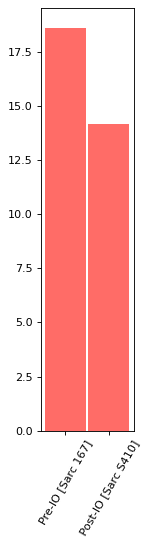

In [26]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(1.5, 7), dpi=80)

# Make a random dataset:
height = [ diversity['Sarcoma167GEX'], diversity['SarcomaS410GEX']]
bars = ( 'Pre-IO [Sarc 167]', ' Post-IO [Sarc S410]')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='#ff6c67', width=0.95)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(rotation=60)
# Show graphic
plt.show()

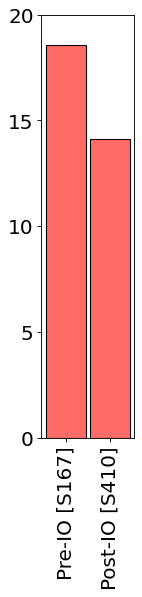

In [42]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(1.5, 7), dpi=80)

# Make a random dataset (replace with your actual data):
height = [diversity['Sarcoma167GEX'], diversity['SarcomaS410GEX']]
bars = ('Pre-IO [Sarc 167]', 'Post-IO [Sarc S410]')
y_pos = np.arange(len(bars))

# Create bars with outlines
bars = plt.bar(y_pos, height, color='#ff6c67', width=0.90, edgecolor='black', linewidth=1)

# Create names on the x-axis
plt.xticks(y_pos, ('Pre-IO [S167]', 'Post-IO [S410]'))
plt.xticks(rotation=90)

# Increase text size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Make y ticks more sparse
plt.yticks(np.arange(0, max(height) + 2, step=5))

# Show graphic
plt.show()


In [33]:
list(bars)

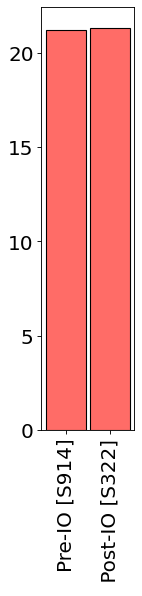

In [44]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(1.5, 7), dpi=80)

# Make a random dataset:
height = [diversity['SarcomaS914GEX'], diversity['Sarcoma322GEX']]
bars = ( 'Pre-IO [Sarc S914]', ' Post-IO [Sarc 322]')
y_pos = np.arange(len(bars))

# Create bars
bars = plt.bar(y_pos, height, color='#ff6c67', width=0.90, edgecolor='black', linewidth=1)

# Create names on the x-axis
plt.xticks(y_pos, ('Pre-IO [S914]', ' Post-IO [S322]'))
plt.xticks(rotation=90)

# Increase text size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Make y ticks more sparse
plt.yticks(np.arange(0, max(height) + 2, step=5))


# Show graphic
plt.show()